In [1]:
import pprint as pp
import os
import sys
import pandas as pd
import numpy as np
from importlib import reload 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
os.cpu_count() 

36

In [2]:
"""
Update path 
"""

sys.path.append("../")

In [3]:
"""
Local imports
"""

import imagePipeline.data_io.loaders as _read
import imagePipeline.data_io.writers as _write
import imagePipeline.preprocess_funcs.transform as _prep

In [4]:
%time
"""
Load the parameter file into memory
"""
params = _read.load_params(params_path="../imagePipeline/inputs/test.json")

"""
load the CZIs from the data directory
"""
reload(_read)

loader = _read.cziLoader(params)  
czi, metadata = loader.get_item(index=0)

print(czi.data.shape)

print("done.")

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 6.68 µs
(1, 176, 4, 30, 472, 652)
done.


In [5]:
# pp.pprint(metadata)

# Image Processing

(-0.5, 651.5, 471.5, -0.5)

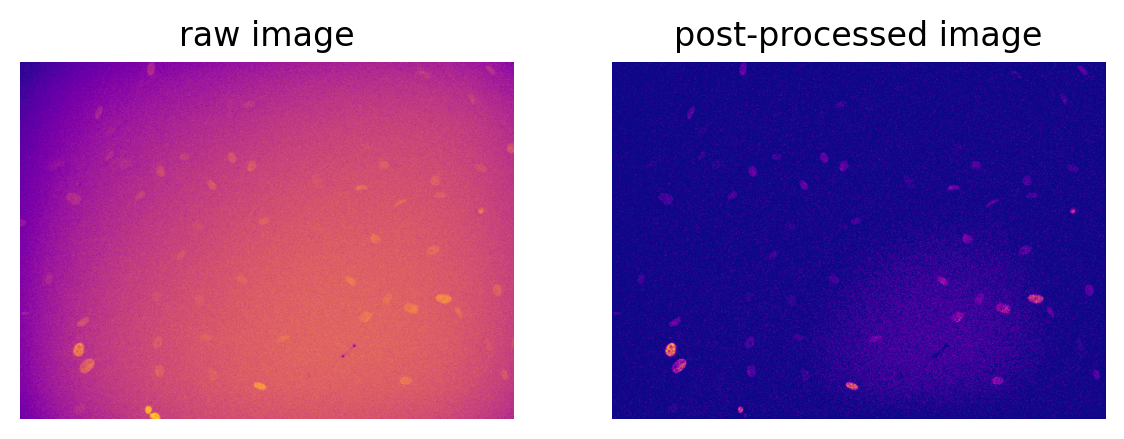

In [6]:
"""
test a single image
"""

reload(_prep)

t = 1
tile = 8
c = 1
CMAP = 'plasma'

"""
create a subset of test data
"""

test_times = czi.data[:, :, :, :, :, :]
test_img = test_times[0, t, c, tile, :, :]

params = _read.load_params(params_path="../imagePipeline/inputs/test.json")
transformer = _prep.ParallelTransformer(params, metadata)

func_list = transformer.process_channels['At425']

processed_test_img = transformer._process_image(test_img, func_list)

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (7, 7)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(test_img, cmap=CMAP)
ax[0].set_title("raw image")
ax[0].axis(False)

ax[1].imshow(processed_test_img, cmap=CMAP)
ax[1].set_title("post-processed image")
ax[1].axis(False)

Text(0.5, 1.0, 'processed image')

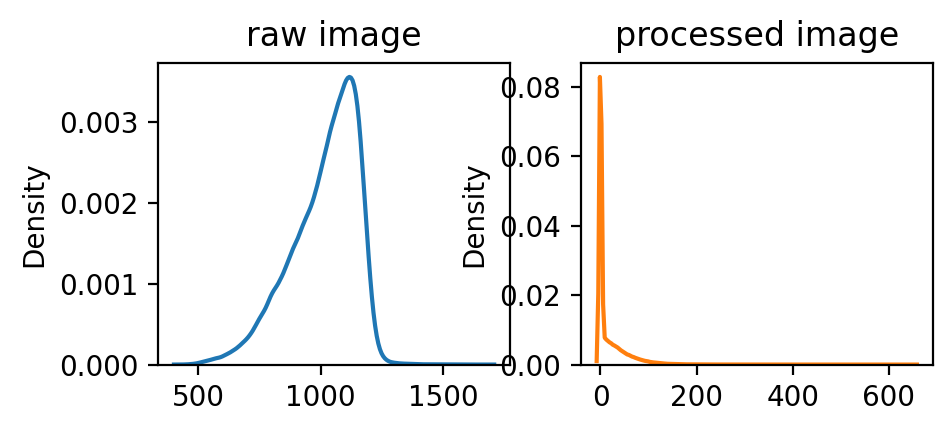

In [7]:
"""
plot pixel values
"""
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (5, 2)
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(test_img.flatten(), ax=ax[0])
ax[0].set_title('raw image')

sns.kdeplot(processed_test_img.flatten(), ax=ax[1], color='C1')
ax[1].set_title('processed image')

# Scene Processing

In [8]:
%time

reload(_prep)

"""
initialize the transformer
"""

transformer = _prep.ParallelTransformer(params, metadata)

"""
transform
"""

processed = transformer.process_tiles(czi_data=test_times)
print(processed.shape)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs
processing: At520
processing: At425
processing: mCher
(1, 176, 3, 30, 472, 652)


In [9]:
# %time
# reload(_prep)

# transformer = _prep.ParallelTransformer(params, metadata)

# stitched = transformer.stitch(processed)
# print(stitched.shape)
# print("done.")

In [10]:
# """
# process the whole stitched image 
# """

# reload(_prep)

# transformer = _prep.ParallelTransformer(params, metadata)

# print(stitched.shape)

# p_stitched = transformer.process_stitched(stitched)

# print(p_stitched.shape)

In [11]:
# t = 1
# c = 1

# stitched_img = stitched[0, t, c, 0, :, :]
# p_stitched_img = p_stitched[0, t, c, 0, :, :]


# fig, ax = plt.subplots(nrows=1, ncols=2)
# ax[0].imshow(stitched_img, cmap=CMAP)
# ax[0].set_title("raw image")
# ax[0].axis(False)

# ax[1].imshow(p_stitched_img, cmap=CMAP)
# ax[1].set_title("post-processed image")
# ax[1].axis(False)

In [12]:
"""
save metadata and such
"""
# reload(_write)

# writer = _write.OutputWriter(params, metadata)

# # save parameters 
# writer.save_params()
# print()

# # save metadata
# writer.save_metadata()
# print()


'\nsave metadata and such\n'

In [13]:
# # save ome_tiff

# reload(_write)
# writer = _write.OutputWriter(params, metadata)

# writer.write_ome(processed)

In [ ]:
"""
save individual tiles
"""
reload(_write)

writer = _write.OutputWriter(params, metadata)

writer.write_tiles(processed)

saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-1.tiff
saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-2.tiff
saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-3.tiff
saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-4.tiff
saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-5.tiff
saved: /nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/processed/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-6.tiff
saved: /nfs/turbo/umms